<a href="https://githubtocolab.com/borislevant/python4cv/blob/main/basic_image_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Basic Image Operations with OpenCV-Python

[![scikit-learn logo](./img/opencv-logo-small.png)](https://docs.opencv.org/3.4/d0/de3/tutorial_py_intro.html)

There are few packages in Python that are built to work with images: ```OpenCV```, ```Scikit-Image``` and ```Pillow```. In this session we will learn the basic image operaitons using the OpenCV and in particular it's Python API - ```OpenCV-Python```. 

OpenCV was started at Intel in 1999 by Gary Bradsky, and the first release came out in 2000. Vadim Pisarevsky joined Gary Bradsky to manage Intel's Russian software OpenCV team. In 2005, OpenCV was used on Stanley, the vehicle that won the 2005 DARPA Grand Challenge. Later, its active development continued under the support of Willow Garage with Gary Bradsky and Vadim Pisarevsky leading the project. OpenCV now supports a multitude of algorithms related to Computer Vision and Machine Learning and is expanding day by day.

OpenCV supports a wide variety of programming languages such as C++, Python, Java, etc., and is available on different platforms including Windows, Linux, OS X, Android, and iOS. Interfaces for high-speed GPU operations based on CUDA and OpenCL are also under active development. OpenCV-Python is the Python API for OpenCV, combining the best qualities of the OpenCV C++ API and the Python language.

To install ```OpenCV-Python``` we run
```
pip install opencv-python 
```
In order to ensure that we have installed the package correctly, lets run the following code


In [3]:
import cv2
cv2.__version__

'4.7.0'

We will also need the following packages to manipulate the images and to display the images inside the Jupyter notebook


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Read, Save and Display Images

In this section we will learn how to read and display images using OpenCV. In order to do it we will use the function ```imread```. It accepts 2 parameters. The first one is the path to the image file and the second one is the format of the image we want to load that can have 3 values:
* ```cv2.IMREAD_COLOR```: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag
* ```cv2.IMREAD_GRAYSCALE```: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag
* ```cv2.IMREAD_UNCHANGED```: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value -1 for this flag

The following code reads the image in the gray-scale mode and printsthe size of the image object - which is the 2D array - the first coordinate representing the *Y* and the second is *X*. The type of the array is unsigned integer of size byte


In [22]:
img = cv2.imread('img/cute_dog_small.jpg', cv2.IMREAD_GRAYSCALE)
print(f'The shape of the img object is {img.shape}')
print(f'The type of the img object is {img.dtype}')

The shape of the img object is (418, 627)
The type of the img object is uint8


Next we would like to display the image in the notebook. We will use the ```Matplotlib``` function ```imshow```. Displaying the grayscale images in addition to the image itself, requires to specify the color map in which we want to show the image. Below we will use a few examples. Please, try to experiment with different values of the color maps, as found in the ```Matplotlib``` tutorial: https://matplotlib.org/stable/tutorials/colors/colormaps.html


Text(0.5, 1.0, 'plasma')

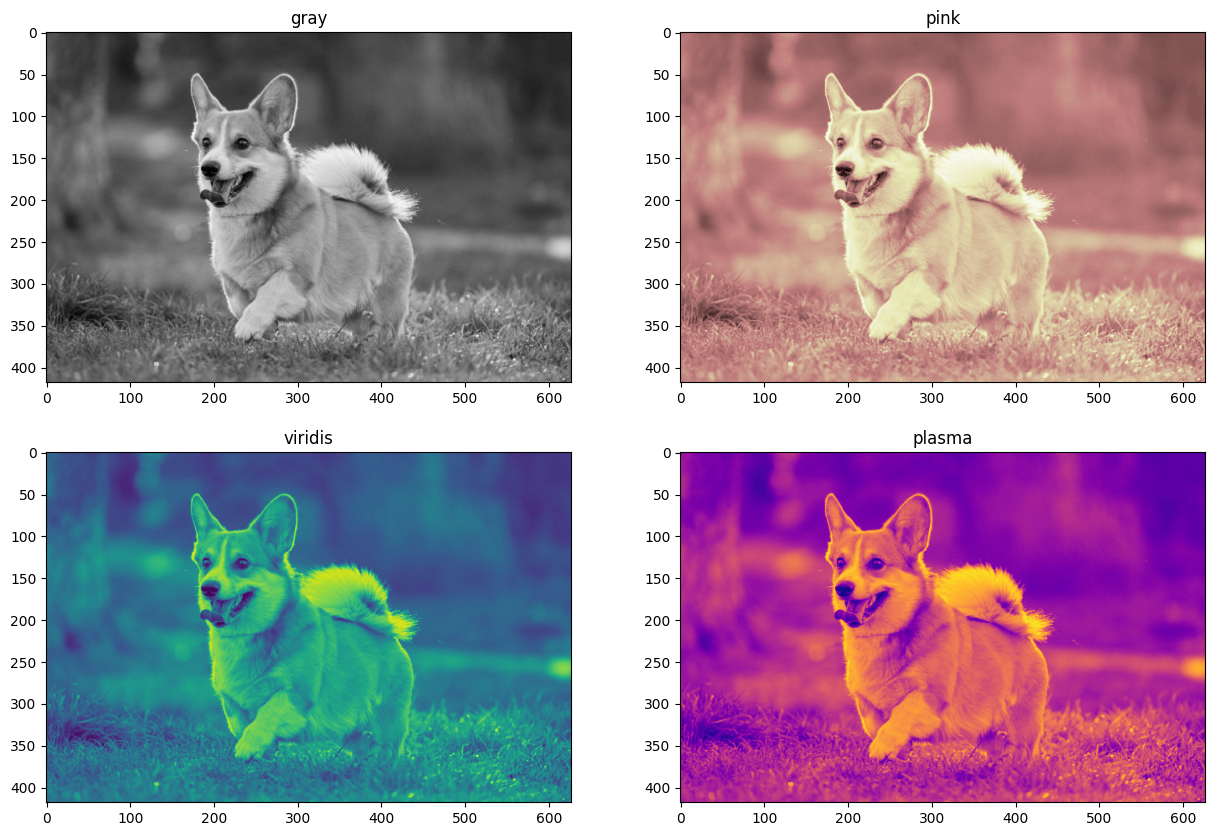

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('gray')
ax[0, 1].imshow(img, cmap='pink')
ax[0, 1].set_title('pink')
ax[1, 0].imshow(img, cmap='viridis')
ax[1, 0].set_title('viridis')
ax[1, 1].imshow(img, cmap='plasma')
ax[1, 1].set_title('plasma')


Now let's read the image as a color. This time we see that the image is a 3D array - third dimension represents the color

In [21]:
imgc = cv2.imread('img/cute_dog_small.jpg', cv2.IMREAD_COLOR)
print(f'The shape of the img object is {imgc.shape}')

The shape of the img object is (418, 627, 3)


By default, the OpenCV images are stored in the BGR format - Blue, Green and Red. In order to convert them to the more familiar RGB, we need to use the function ```cvtColor```. It is used to convert between different color spaces and we will use it in the future

Text(0.5, 1.0, 'RGB format')

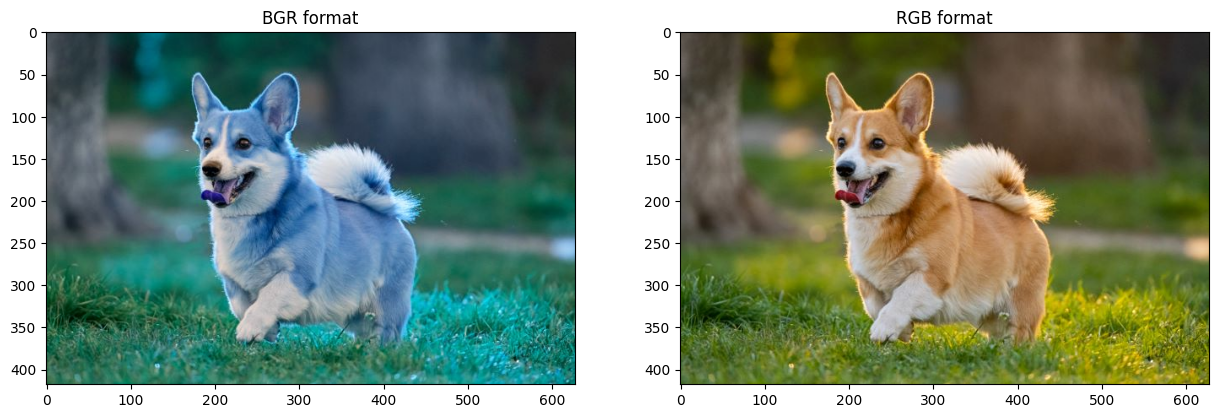

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax[0].imshow(imgc)
ax[0].set_title('BGR format')
ax[1].imshow(cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB))
ax[1].set_title('RGB format')

In [4]:
camera = cv2.VideoCapture(0)
for i in range(10):
    return_value, image = camera.read()
    cv2.imwrite('opencv'+str(i)+'.png', image)
del(camera)